In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

migrants = pd.read_csv('MissingMigrants_Global_2019.csv')
migrants.head()

,Web_ID,Region_of_Incident,Reported_Date,Reported_Year,Reported_Month,Number_Dead,Minimum_Estimated_Number_of_Missing,Total_Dead_and_Missing,Number_of_Survivors,Number_of_Females,...,Number_of_Children,Cause_of_Death,Location_Description,Information_Source,Latitude,Longitude,Migration_Route,URL,UNSD_Geographical_Grouping,Source_Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,0,2,2,36,0,...,0,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,38.362369,26.172509,Eastern Mediterranean,Not Available,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4,0,4,11,3,...,1,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,39.441976,26.378816,Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1,0,1,0,0,...,0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta",35.871902,-5.343038,Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1,0,1,0,0,...,0,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,35.635116,-5.275650,Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1,0,1,0,0,...,0,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste",19.334475,-98.069824,Unknown,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [3]:
df = migrants[['Region_of_Incident','Total_Dead_and_Missing','Number_of_Survivors','Source_Quality',
                      'Reported_Year']]

In [4]:
df['Reliablity'] = df.Source_Quality.apply(lambda x: 1 if x > 3 else 0)

In [5]:
X = df[['Region_of_Incident','Source_Quality','Reported_Year']]
y = df["Total_Dead_and_Missing"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5333, 3) (5333, 1)


In [6]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Region_of_Incident"])
data_binary_encoded.head()

,Source_Quality,Reported_Year,Region_of_Incident_Caribbean,Region_of_Incident_Central America,Region_of_Incident_Central Asia,Region_of_Incident_East Asia,Region_of_Incident_Europe,Region_of_Incident_Horn of Africa,Region_of_Incident_Mediterranean,Region_of_Incident_Middle East,Region_of_Incident_North Africa,Region_of_Incident_North America,Region_of_Incident_South America,Region_of_Incident_South Asia,Region_of_Incident_Southeast Asia,Region_of_Incident_Sub-Saharan Africa,Region_of_Incident_US-Mexico Border
0,5,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Source_Quality,Reported_Year,Region_of_Incident_Caribbean,Region_of_Incident_Central America,Region_of_Incident_Central Asia,Region_of_Incident_East Asia,Region_of_Incident_Europe,Region_of_Incident_Horn of Africa,Region_of_Incident_Mediterranean,Region_of_Incident_Middle East,Region_of_Incident_North Africa,Region_of_Incident_North America,Region_of_Incident_South America,Region_of_Incident_South Asia,Region_of_Incident_Southeast Asia,Region_of_Incident_Sub-Saharan Africa,Region_of_Incident_US-Mexico Border
2078,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2895,3,2017,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5003,4,2015,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2291,5,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1876,3,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

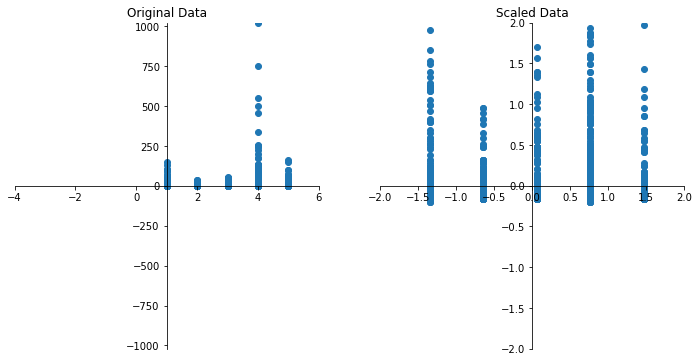

In [10]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Source_Quality"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Source_Quality"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [11]:
X = pd.get_dummies(df[['Region_of_Incident','Source_Quality','Reported_Year']])
y = df["Total_Dead_and_Missing"].values.reshape(-1, 1)
X.head()

,Source_Quality,Reported_Year,Region_of_Incident_Caribbean,Region_of_Incident_Central America,Region_of_Incident_Central Asia,Region_of_Incident_East Asia,Region_of_Incident_Europe,Region_of_Incident_Horn of Africa,Region_of_Incident_Mediterranean,Region_of_Incident_Middle East,Region_of_Incident_North Africa,Region_of_Incident_North America,Region_of_Incident_South America,Region_of_Incident_South Asia,Region_of_Incident_Southeast Asia,Region_of_Incident_Sub-Saharan Africa,Region_of_Incident_US-Mexico Border
0,5,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,2019,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3,2019,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

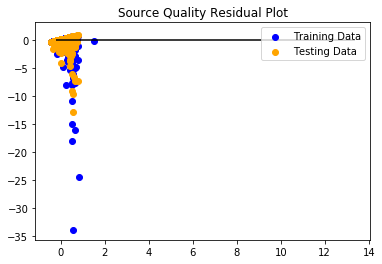

In [16]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Source Quality Residual Plot")
plt.savefig("source_quality_linear")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5626968053163786, R2: 0.09636853069552997
